In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ln -s "/content/drive/My Drive/Estudos/unifor/Oitavo/Sistemas inteligentes/adaline" /content/dados

### Explorando

In [ ]:
import pandas as pd

In [ ]:
treino = pd.read_csv('dados/dataset-treinamento.csv')

In [ ]:
treino['d']=treino['d'].astype('int')

# Adaline

In [ ]:
import numpy as np


class Adaline:
    def __init__(self,input_values,output_values,learn_rate,activation_function,precision=1e-6):
        ones_column = np.ones((len(input_values),1))*-1
        self.input_values=np.append(ones_column,input_values, axis=1)
        self.output_values=output_values
        self.learn_rate=learn_rate
        self.activation_function=activation_function
        self.W= np.random.rand(input_values.shape[1]+1)
        self.Wi= self.W.copy()
        self.precision = precision
        self.hist_EQM=[]
        # self.theta = np.random.rand(1)[0]
    def EQM(self,w):
        eqm = 0
        for values in zip(self.input_values, self.output_values):
            u = np.dot(values[0], w)
            eqm += (values[1] - u) ** 2
        return eqm/len(self.input_values)

    def evaluate(self,x):
        x= np.append([[-1]],[x], axis=1)
        u= np.dot(x,self.W)
        return self.activation_function(u)

    def train (self):
        epochs = 1
        eqmf=0
        while True:
           
            eqma = self.EQM(self.W)
            self.hist_EQM.append(eqma)
            for x,d in zip(self.input_values,self.output_values):
                u= np.dot(x,self.W)
                self.W=self.W+self.learn_rate*(d-u)*x

            epochs+=1

            eqmf = self.EQM(self.W)
            
            if abs(eqmf - eqma) <= self.precision:
                break
        self.hist_EQM.append(eqmf)
        return self.Wi,self.W,epochs,self.hist_EQM
        print(f'final W: {self.W}')

In [ ]:
def binary_step(x):
    return 1 if x>=0 else 0
def sign_function(x):
    return 1 if x>=0 else -1

# Resultado

In [ ]:
teste = pd.read_csv('dados/dataset-teste.csv')

In [ ]:
Y = treino['d'].values.copy()
X = treino[['x1','x2','x3','x4']].values.copy()

In [ ]:
Resultado=teste.copy()
Treinamentos = pd.DataFrame()
hist_EQM =[]
for i in range(5):

    activation_function = sign_function
    adaline = Adaline(X,Y,0.0025, activation_function)
    wi,wf,ep,EQM = adaline.train()
    hist_EQM.append(EQM)
    wi = [round(x,4) for x in wi] 
    wf = [round(x,4) for x in wf]
    w = np.concatenate(([wi],[wf],[[ep]]),axis=1)

    Treino = pd.DataFrame(data=w,columns=['Wi0','Wi1','Wi2','Wi3','Wi4','Wf0','Wf1','Wf2','Wf3','Wf4','N_Epocas'],index=[f'T{i+1}'])
    Treinamentos= pd.concat([Treinamentos,Treino])

    resultado_parcial=pd.DataFrame(columns=[f'T{i+1}'])
    respostas=[]
    for j in teste.values:
        respostas.append(adaline.evaluate(j))

    resultado_parcial=pd.DataFrame(data=respostas,columns=[f'T{i+1}'])
    Resultado= pd.concat([Resultado,resultado_parcial],axis=1)
    

In [ ]:
print(Treinamentos)

       Wi0     Wi1     Wi2     Wi3  ...     Wf2     Wf3     Wf4  N_Epocas
T1  0.7016  0.0889  0.1233  0.2854  ...  1.6423 -0.4278 -1.1778     927.0
T2  0.7723  0.0691  0.5087  0.4368  ...  1.6424 -0.4277 -1.1778     920.0
T3  0.2846  0.5615  0.0504  0.3403  ...  1.6423 -0.4277 -1.1778     900.0
T4  0.4821  0.5771  0.6079  0.3252  ...  1.6423 -0.4276 -1.1778     889.0
T5  0.1262  0.5233  0.6522  0.7888  ...  1.6424 -0.4276 -1.1778     888.0

[5 rows x 11 columns]


In [ ]:
print(Resultado)

        x1      x2      x3      x4  T1  T2  T3  T4  T5
0   0.9694  0.6909  0.4334  3.4965  -1  -1  -1  -1  -1
1   0.5427  1.3832  0.6390  4.0352  -1  -1  -1  -1  -1
2   0.6081 -0.9196  0.5925  0.1016   1   1   1   1   1
3  -0.1618  0.4694  0.2030  3.0117  -1  -1  -1  -1  -1
4   0.1870 -0.2578  0.6124  1.7749  -1  -1  -1  -1  -1
5   0.4891 -0.5276  0.4378  0.6439   1   1   1   1   1
6   0.3777  2.0149  0.7423  3.3932   1   1   1   1   1
7   1.1498 -0.4067  0.2469  1.5866   1   1   1   1   1
8   0.9325  1.0950  1.0359  3.3591   1   1   1   1   1
9   0.5060  1.3317  0.9222  3.7174  -1  -1  -1  -1  -1
10  0.0497 -2.0656  0.6124 -0.6585  -1  -1  -1  -1  -1
11  0.4004  3.5369  0.9766  5.3532   1   1   1   1   1
12 -0.1874  1.3343  0.5374  3.2189  -1  -1  -1  -1  -1
13  0.5060  1.3317  0.9222  3.7174  -1  -1  -1  -1  -1
14  1.6375 -0.7911  0.7537  0.5515   1   1   1   1   1


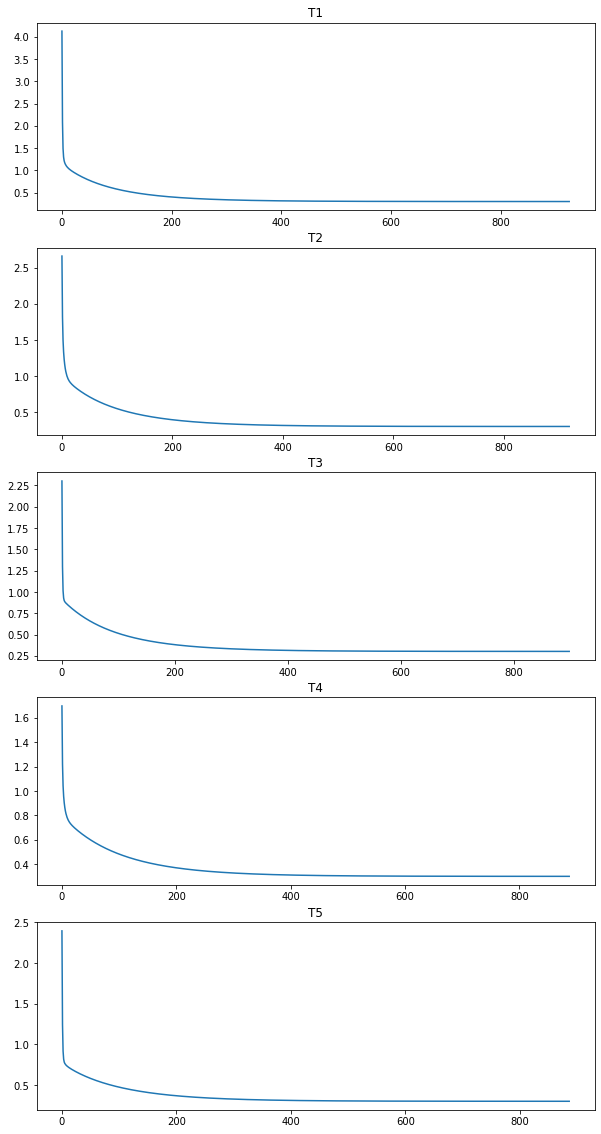

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(hist_EQM[i])
    plt.title(f"T{i+1}")
plt.show()

In [ ]:
Resultado=treino.copy()
Treinamentos = pd.DataFrame()
hist_EQM =[]
for i in range(5):

    activation_function = sign_function
    adaline = Adaline(X,Y,0.0025, activation_function)
    wi,wf,ep,EQM = adaline.train()
    hist_EQM.append(EQM)
    wi = [round(x,4) for x in wi] 
    wf = [round(x,4) for x in wf]
    w = np.concatenate(([wi],[wf],[[ep]]),axis=1)

    Treino = pd.DataFrame(data=w,columns=['Wi0','Wi1','Wi2','Wi3','Wi4','Wf0','Wf1','Wf2','Wf3','Wf4','N_Epocas'],index=[f'T{i+1}'])
    Treinamentos= pd.concat([Treinamentos,Treino])

    resultado_parcial=pd.DataFrame(columns=[f'T{i+1}'])
    respostas=[]
    for j in treino.values:
        respostas.append(adaline.evaluate(j[:-1]))

    resultado_parcial=pd.DataFrame(data=respostas,columns=[f'T{i+1}'])
    Resultado= pd.concat([Resultado,resultado_parcial],axis=1)
    

In [ ]:
print(Resultado)


        x1      x2      x3      x4  d  T1  T2  T3  T4  T5
0   0.4329 -1.3719  0.7022 -0.8535  1   1   1   1   1   1
1   0.3024  0.2286  0.8630  2.7909 -1  -1  -1  -1  -1  -1
2   0.1349 -0.6445  1.0530  0.5687 -1  -1  -1  -1  -1  -1
3   0.3374 -1.7163  0.3670 -0.6283 -1   1   1   1   1   1
4   1.1434 -0.0485  0.6637  1.2606  1   1   1   1   1   1
5   1.3749 -0.5071  0.4464  1.3009  1   1   1   1   1   1
6   0.7221 -0.7587  0.7681 -0.5592  1   1   1   1   1   1
7   0.4403 -0.8072  0.5154 -0.3129  1   1   1   1   1   1
8  -0.5231  0.3548  0.2538  1.5776 -1  -1  -1  -1  -1  -1
9   0.3255 -2.0000  0.7112 -1.1209  1  -1  -1  -1  -1  -1
10  0.5824  1.3915 -0.2291  4.1735 -1   1   1   1   1   1
11  0.1340  0.6081  0.4450  3.2230 -1  -1  -1  -1  -1  -1
12  0.1480 -0.2988  0.4778  0.8649  1   1   1   1   1   1
13  0.7359  0.1869 -0.0872  2.3584  1   1   1   1   1   1
14  0.7115 -1.1469  0.3394  0.9573 -1  -1  -1  -1  -1  -1
15  0.8251 -1.2840  0.8452  1.2382 -1  -1  -1  -1  -1  -1
16  0.1569  0.